# Ch11: Survival Analysis and Censored Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

%matplotlib inline

In [2]:
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test


## Conceptual


### **Q1**


**(a)** **Independent**, as censoring the patients whose phone numbers start with "2" doesn't give us any information about the time to disease relapse for the patient.

**(b)** **Not independent**, as censoring patients whose ages exceed $99$ years old is directly related to the event being measured (longevity).

**(c)** **Not independent**, as patients who are very sick are likely to have shorter lives, and the variable of interest here is longevity.

**(d)** **Not independent**, because censoring here is caused directly by the event (finding work).

**(e)** **Not independent**, because censoring is again caused directly by the event happening early (giving birth).

**(f)** **Not independent**, because censoring is directly related to the variable studied (years of education), a lot of residents who have higher years of education will likely be censored. 

**(g)** **Independent**, because the duration of the study is pre-determined to be $5$ years which is unrelated to the prognosis of any of the patients.

**(h)** **Independent**, since the components have no difference in quality, the censoring time doesn't tell us which is likely to last longer.

**(i)** **Not independent**, as knowing the censoring time tells which of the components will last longer since we know components from the older factory are of higher quality.

### **Q2** 


**(a)** 
1. Not censored.
2. Censored.
3. Censored.
4. Not censored.


**(b)**

1. $c_1$ is not known. 
2. $c_2 = 2 \space \text{years}$
3. $c_3 = 1.5 \space \text{years}$
4. $c_4$ is not known.

**(c)** 

1. $t_1 = 1.2 \space \text{years}$ 
2. $t_2$ is not known.
3. $t_3$ is not known.
4. $t_4 = 0.2 \space \text{years}$

**(d)**

1. $y_1 = 1.2 \space \text{years}$ 
2. $y_2 = 2 \space \text{years}$
3. $y_3 = 1.5 \space \text{years}$
4. $y_4 = 0.2 \space \text{years}$

**(e)**

1. $\delta_1 = 1$ 
2. $\delta_2 = 0$
3. $\delta_3 = 0$
4. $\delta_4 = 1$

### **Q3**

We have **2 non-censored events** (phone replacements) so:  

$$
K = 2
$$

$ d_k $: The unique event times for non-censored participants.  

$$
d_1 = 0.2 \text{ years} \quad d_2 = 1.2 \text{ years}
$$

$ r_k $: The number of phones available for replacement just before $d_k$.

$$
r_1 = 4 \quad r_2 = 3
$$

$ q_k $: The number of phones replaced at time $d_k$.

$$
q_1 = 1 \quad q_2 = 1
$$

### **Q4**

**(a)** The estimated probability past a time $d_k$ is:

$$
\hat S(d_k) = \prod_{j=1}^k \left( \frac{r_j - q_j}{r_j} \right) 
$$

For a time $t$ that's greater than $d_k$ and less than $d_{k+1}$:

$$
\hat S(t) = \hat S(d_k)
$$


For $t = 50$:

$$
\hat S(50) = \hat S(d_2) = \hat S(37.2)
$$

Which means the estimated probability of survival past $50$ days is the same as that for $37.2$ days, which is:

$$
\hat S(d_2)  = \left( \frac{r_2 - q_2}{r_2} \right) \times \left( \frac{r_1 - q_1}{r_1} \right)
$$

We can easily find the values for $r_j$ and $q_j$ from the table.

$$
r_1 = 5 \quad q_1 = 1 
$$

$$
r_2 = 4 \quad q_2 = 1 
$$

Plugging in the equation above:

In [3]:
r1 = 5
q1 = 1
r2 = 4
q2 = 1
S = (r2 - q2) / r2 * (r1 - q1) / r1
S

0.6

$$
\hat S(50) = 60\%
$$

**(b)**

$$
\hat S(t) = 
\begin{cases}
1 &     \text{if} \space t \lt 26.5 \\
0.8 &   \text{if} \space 26.5 \le t \lt 37.2 \\
0.6 &   \text{if} \space 36.2 \le t \lt 57.3 \\
0.4 &   \text{if} \space t \ge 57.3 \\
\end{cases}
$$

### **Q5**

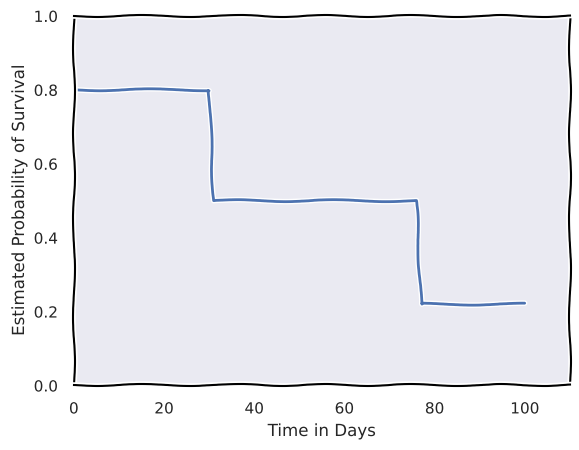

In [4]:
with plt.xkcd():
    plt.rcParams["font.family"] = "DejaVu Sans"  # to get rid of xkcd font warnings

    def S(t):
        if t < 31:
            return 0.8
        elif 31 <= t < 77:
            return 0.5
        elif t >= 77:
            return 0.22

    t = np.linspace(0, 100, 101)
    s = np.vectorize(S, otypes=[float])(t)

    plt.plot(t, s)
    plt.xlabel("Time in Days")
    plt.ylabel("Estimated Probability of Survival")
    plt.xlim([0, 110])
    plt.ylim([0, 1])


### **Q6**


**(a)**

$\delta_i$: The censoring indicator variable. 

$$
\delta_1 = 1 \quad \delta_2 = 0 \quad \delta_3 = 1 \quad \delta_4 = 0 
$$

We have **2 non-censored events** so:  

$$
K = 2
$$

$ d_k $: The unique event times for non-censored patients.  

$$
d_1 = 150 \space \text{days} \quad d_2 = 300 \space \text{days}
$$

$ r_k $: The number of patients at risk just before $d_k$.

$$
r_1 = 4 \quad r_2 = 2
$$

$ q_k $: The number of deaths at time $d_k$.

$$
q_1 = 1 \quad q_2 = 1
$$


**(b)**



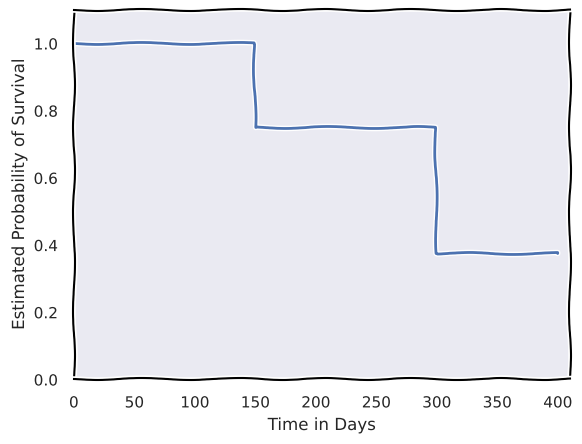

In [5]:
with plt.xkcd():
    plt.rcParams["font.family"] = "DejaVu Sans"  # to get rid of xkcd font warnings

    def S(t):
        if t < 150:
            return 1
        elif 150 <= t < 300:
            return (4 - 1) / 4
        elif t >= 300:
            return ((2 - 1) / 2) * ((4 - 1) / 4)

    t = np.arange(0, 401)
    s = np.vectorize(S, otypes=[float])(t)

    plt.plot(t, s)
    plt.xlabel("Time in Days")
    plt.ylabel("Estimated Probability of Survival")
    plt.xlim([0, 410])
    plt.ylim([0, 1.1])

**(c)**
The probability that the event happens within $200$ days is:

$$
1 - \hat S(200) = 1 - 0.75 = 0.25 = 25\%
$$


The probability that the event doesn't occur within $310$ days is:

$$
\hat S(310) = 0.375 = 37.5\%
$$

**(d)** 

This would be the expression for that estimated survival curve:

$$
\hat S(t) =
\begin{cases}
1 &     \text{if} \space t < 150 \\
0.75 &   \text{if} \space 150 \le t < 300 \\
0.375 &   \text{if} \space t \ge 300 \\
\end{cases}
$$

### **Q7**


**(a)** From the definition of the hypergeometric distribution ([wikipedia's](https://en.wikipedia.org/wiki/Hypergeometric_distributio )):

The probability of $k$ successes (random draws for which the object drawn has a specified feature) in $n$ draws, without replacement, from a finite population of size $N$ that contains exactly $K$ objects with that feature, wherein each draw is either a success or a failure.

$$
P(X=k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}
$$


For our case that would be the probability of $q_{1k}$ failures, in $r_{1k}$ draws, without replacement, from a risk set of $r_k$ observations that contains a total of $q_k$ failures.

$$
P(X=q_{1k}) = \frac{\binom{q_k}{q_{1k}} \binom{r_k-q_k}{r_{1k}-q_{1k}}}{\binom{r_k}{r_{1k}}}
$$

The equivalent variable for each

$$
k = q_{1k} \quad K = q_k \quad n = r_{1k} \quad N = r_k
$$

**(b)** Given the mean and variance of the hypergeometric distribution:

$$
E[X] = n \frac{K}{N} = r_{1k} \frac{q_k}{r_k} = \mu_k
$$

$$
Var(X) = n \frac{K}{N} \frac{N-K}{N} \frac{N-n}{N-1} = r_{1k} \frac{q_k}{r_k} \frac{r_k-q_k}{r_k} \frac{r_k-r_{1k}}{r_k-1} = Var(q_{1k})
$$

Comparing to the equations in the book (11.5) and (11.6) we can see that they're equivalent.


### **Q8**


The given function definitions:

$$
S(t) = \Pr(T > t)
$$

$$
h(t) = \lim_{\Delta t \to 0} \frac{\Pr(t < T \leq t + \Delta t | T > t)}{\Delta t}
$$

$$
f(t) = \lim_{\Delta t \to 0} \frac{\Pr(t < T \leq t + \Delta t)}{\Delta t}
$$

Defining $F(t) = 1 - S(t)$:

$$
F(t) = 1 - \Pr(T \gt t) = \Pr(T \lt t) 
$$

---
Proving that $f(t) = dF(t)/dt$ holds:

$$
\frac{d}{dt} F(t) = \frac{d}{dt} \Pr(T < t)
$$

Using the definition of the derivative to expand the R.H.S:

$$
\frac{d}{dx} f(x) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

$$
\frac{d}{dt} \Pr(T < t) = \lim_{\Delta t \to 0} \frac{\Pr(T < t + \Delta t) - \Pr(T < t)}{\Delta t}
$$


Simplifying the expression on the right:

$$
\frac{d}{dt} \Pr(T < t) = \lim_{\Delta t \to 0} \frac{\Pr(t < T \leq t + \Delta t)}{\Delta t} = f(t)
$$

Thus, we have shown that $f(t) = dF(t)/dt$.
___

Prove that:

$$
S(t) = \exp\left(-\int_{0}^{t} h(u)du \right) \\
$$

From the book (11.10):

$$
h(t) = \frac{f(t)}{S(t)}
$$ 

Using the equation we proved eariler:

$$
h(t) = \frac{1}{S(t)} \frac{dF(t)}{dt} 
$$

Substituting for $h(u)$ then doing a change of variables using $F(u) = 1 - S(u)$ and $dF(u) = -dS(u)$:

\begin{align*}
S(t) &= \exp\left(-\int_{0}^{t} h(u)du \right) \\
&= \exp \left( -\int_{0}^{t} \frac{1}{S(u)} \frac{dF(u)}{du} du \right) \\
&= \exp \left( -\int_{S(0)}^{S(t)} \frac{1}{S(u)} -dS(u) \right) \\
&= \exp \left( \ln(S(u))\biggr\rvert^{S(t)}_{S(0)} \right) \\
&= \exp \left( \ln(S(t)) - \ln(S(0) )\right)
\end{align*} 

Knowing that the probability of survival at time $0$ is $1$:

$$
S(0) = 1
$$


Substituting above:

\begin{align*}
&= \exp(\ln(S(t)) - \ln(1))  \\
&= \exp(\ln(S(t)))           \\
&= S(t)
\end{align*}

Which is what we set out to prove.


### **Q9**


**(a)** Given that:

\begin{align*}
f(t) = \lambda \exp(-\lambda t) \\
F(t) = 1 - S(t) \\
f(t) = dF(t)/dt \\
\end{align*}

Show that:

$$
S(t) = \exp(-\lambda t)
$$

Taking the antiderivative of $f(t)$ to find $F(t)$:

$$
F(t) = \int_{0}^{t} f(\tau) d\tau
$$

Substituting for $F(t)$ and $f(t)$:

\begin{align*}
S(t) &= 1 - \int_{0}^{t} \lambda \exp(-\lambda \tau) d\tau \\
     &= 1 - (-\exp(- \lambda t) \biggr \rvert_{0}^{t})  \\
     &= 1 - (-\exp(-\lambda t) + \exp(0))  \\
     &= 1 - (1 - \exp(-\lambda t))  \\
     &= \exp(-\lambda t)  \\
\end{align*}

which is what we set out to prove.


**(b)**


The likelihood of the $i\text{th}$ observation is:

\begin{align*}
L_i &= 
\begin{cases}
f(y_i)  \quad \text{ if the ith observation is not censored}\\
S(y_i)  \quad \text{ if the ith observation is censored} \\
\end{cases}  \\
&= f(y_i)^{\delta_i} S(y_i)^{1 - \delta_i} \\
&= (\lambda \exp(-\lambda y_i))^{\delta_i} (\exp(-\lambda y_i))^{1 - \delta_i} \\
&= \lambda^{\delta_i} (\exp(-\lambda y_i))^{\delta_i} \frac{(\exp(-\lambda y_i))^{1}}{(\exp(-\lambda y_i))^{\delta_i}} \\
&= \lambda^{\delta_i} \exp(-\lambda y_i) \\
\end{align*}

The likelihood of the data is the product of the likelihoods for each of the $n$ independent observations:

\begin{align*}
L = \prod_{i = 1}^{n} L_i &= \prod_{i = 1}^{n} \lambda^{\delta_i} \exp(-\lambda y_i) \\
\end{align*}


**(c)**


To derive the maximum likelihood estimator for $\lambda$, we start by maximizing the log of the likelihood we derived earlier:

\begin{align*}
\ell(\lambda) = \ln(L) &= \ln \left( \prod_{i = 1}^{n} \lambda^{\delta_i} \exp(-\lambda y_i) \right) \\
                        &= \ln \left( \frac{\prod_{i = 1}^{n} \lambda^{\delta_i}}{\prod_{i = 1}^{n} \exp(\lambda y_i)} \right) \\
                        &= \ln \left( \lambda^{\sum_{i = 1}^n \delta_i} \right) - \left(\lambda \sum_{i = 1}^n  y_i \right) \\
                        &= \left( \ln( \lambda) \sum_{i = 1}^n \delta_i \right) - \left(\lambda \sum_{i = 1}^n  y_i \right) \\
\end{align*}

To maximize $\ell(\lambda)$ we set its derivative equal to zero:

$$
\frac{d\ell(\lambda)}{d\lambda} = 0
$$

$$
\frac{d\ell(\lambda)}{d\lambda} = \frac{1}{\lambda} \sum_{i = 1}^n \delta_i -  \sum_{i = 1}^n  y_i 
$$

Equating it to $0$ and solving for $\lambda$:

$$
\frac{1}{\lambda} \sum_{i = 1}^n \delta_i -  \sum_{i = 1}^n  y_i = 0 \\
$$

The maximum likelihood estimate for $\lambda$ would be:

$$
\hat \lambda = \sum_{i = 1}^n \delta_i/\sum_{i = 1}^n  y_i \\
$$

Which is what we set out to prove.

**(d)** Since the mean of an $Exp(\lambda)$ random variable is $1/\lambda$, we can use the $\text{MLE}$ for $\lambda$ we got in part **(c)**:

\begin{align*}
\hat \mu &= \frac{1}{\hat \lambda} \\ 
         &= \frac{1}{\sum_{i = 1}^n \delta_i/\sum_{i = 1}^n  y_i} \\
         &= \sum_{i = 1}^n y_i /\sum_{i = 1}^n \delta_i \\
\end{align*}

## Applied

### **Q10**


In [6]:
BrainCancer = load_data("BrainCancer")
BrainCancer.head()

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [7]:
BrainCancer.describe()

,ki,gtv,status,time
count,88.000000,88.000000,88.000000,88.000000
mean,81.022727,8.660795,0.397727,27.457500
std,10.508866,8.657576,0.492233,20.124412
min,40.000000,0.010000,0.000000,0.070000
25%,80.000000,2.500000,0.000000,10.392500
50%,80.000000,6.510000,0.000000,24.030000
75%,90.000000,12.100000,1.000000,41.597500
max,100.000000,34.640000,1.000000,82.560000


In [8]:
BrainCancer.describe(include="category")

,sex,diagnosis,loc,stereo
count,88,87,88,88
unique,2,4,2,2
top,Female,Meningioma,Supratentorial,SRT
freq,45,42,69,65


In [9]:
BrainCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sex        88 non-null     category
 1   diagnosis  87 non-null     category
 2   loc        88 non-null     category
 3   ki         88 non-null     int64   
 4   gtv        88 non-null     float64 
 5   stereo     88 non-null     category
 6   status     88 non-null     int64   
 7   time       88 non-null     float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 3.8 KB


**(a)**

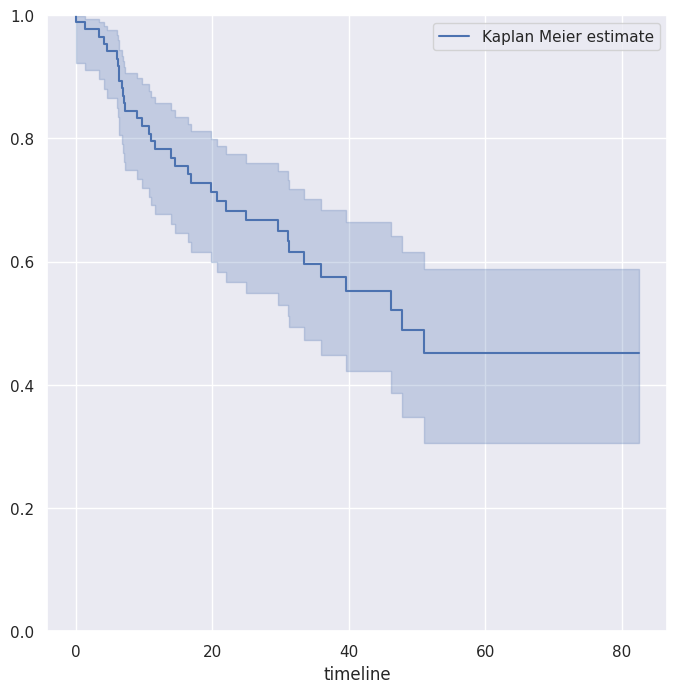

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_ylim([0,1])
km = KaplanMeierFitter()
km_brain = km.fit(BrainCancer["time"], BrainCancer["status"])
km_brain.plot(label="Kaplan Meier estimate", ax=ax);

**(b)** We'll use a modified version of the `boot_SE` function we used in chapter 5:

In [11]:
def boot_SE(
    func,
    df: pd.DataFrame,
    timepoints: np.ndarray = np.linspace(0, 100, 500),
    n=None,
    B=1000,
    seed=0,
):
    """
    Calculates the bootstrap standard error for a function that returns
    a lifelines fitter object.

    Args:
        func: A function that takes a DataFrame and indices and returns
              a fitted lifelines fitter object.
        df: The original DataFrame.
        timpoints: an array of timepoints which we calculate the SE at.
        n: The sample size for bootstrapping (defaults to D.shape[0]).
        B: The number of bootstrap samples.
        seed: Random seed for reproducibility.

    Returns:
        A pandas Series containing the standard error for the survival
        probability at each timepoint in the timepoints array.
    """
    rng = np.random.default_rng(seed)
    n = n or df.shape[0]
    fitters = []

    for _ in range(B):
        idx = rng.choice(df.index, n, replace=True)
        fitter = func(df, idx)
        fitters.append(fitter)

    predictions_list = []

    # Predict survival for each fitter at timepoints
    for i, fitter in enumerate(fitters):
        preds = fitter.predict(timepoints).rename(f"prediction_{i}")
        predictions_list.append(preds)

    predictions = pd.concat(predictions_list, axis=1)

    # calculate standard error 
    # (both methods below are equivalent and calculate the population standard deviation)
    
    # first_ = predictions.sum(axis=1)
    # second_ = (predictions**2).sum(axis=1)
    # se = np.sqrt(second_ / B - (first_ / B) ** 2)
    
    se = predictions.std(axis=1, ddof=0)

    return se

Defining a `boot_fn` function that fits the Kaplan-Meier survival curve:

In [12]:
def boot_fn(df: pd.DataFrame, idx: np.ndarray):
    data = df.loc[idx]

    km = KaplanMeierFitter()
    km_brain = km.fit(data["time"], data["status"])
    return km_brain

In [13]:
timepoints = np.linspace(0, 85, 500)

boot_std_error = boot_SE(
    boot_fn, df=BrainCancer, timepoints=timepoints, n=88, B=200, seed=42
)

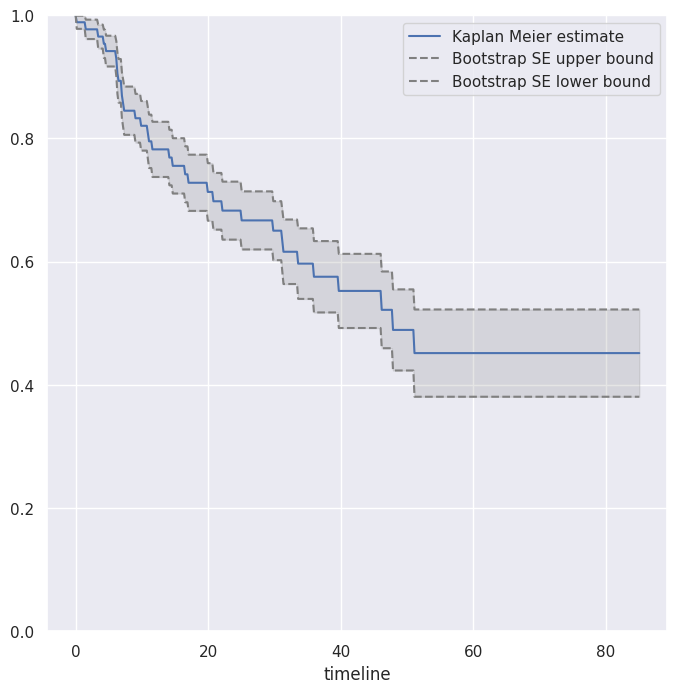

In [14]:
km_brain = KaplanMeierFitter().fit(BrainCancer["time"], BrainCancer["status"])
surv_curve = km_brain.survival_function_at_times(timepoints)
pos_std = surv_curve + boot_std_error
neg_std = surv_curve - boot_std_error

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(surv_curve, label="Kaplan Meier estimate")
ax.plot(pos_std, color="gray", linestyle="--", label="Bootstrap SE upper bound")
ax.plot(neg_std, color="gray", linestyle="--", label="Bootstrap SE lower bound")
ax.fill_between(surv_curve.index, neg_std, pos_std, color="gray", alpha=0.2)
ax.set_ylim([0,1])
ax.set_xlabel("timeline")
ax.legend()
plt.show()

We can see that the bootstrap SE estimate band is quite a bit narrower than the one from the Kaplan-Meier fitter.

**(c)** 

In [15]:
cleaned = BrainCancer.dropna()
all_MS = MS(cleaned.columns, intercept=False)
all_df = all_MS.fit_transform(cleaned)
fit_all = CoxPHFitter().fit(all_df,
                      'time',
                      'status')
fit_all.summary[['coef', 'se(coef)', 'p']]

,coef,se(coef),p
covariate,,,
sex[Male],0.183748,0.360358,0.610119
diagnosis[LG glioma],-1.239530,0.579555,0.032455
diagnosis[Meningioma],-2.154566,0.450524,0.000002
diagnosis[Other],-1.268870,0.617672,0.039949
loc[Supratentorial],0.441195,0.703669,0.530665
ki,-0.054955,0.018314,0.002693
gtv,0.034293,0.022333,0.124661
stereo[SRT],0.177778,0.601578,0.767597


We can see statistically significant p-values for the coefficients of `ki`, `LG glioma`, `Meningioma`, `other`.


**(d)** First we'll group the single `ki == 40` with the `ki == 60` observations.

In [16]:
cleaned.loc[cleaned['ki'] == 40, 'ki'] = 60

Now we'll adjust for other predictors, using the mode for categorical variables and the mean for numerical ones.

In [17]:
levels = sorted(cleaned['ki'].unique(), reverse=True)
def representative(series):
    if hasattr(series.dtype, 'categories'):
        return pd.Series.mode(series)
    else:
        return series.mean()
modal_data = cleaned.apply(representative, axis=0)

modal_df = pd.DataFrame(
              [modal_data.iloc[0] for _ in range(len(levels))])
modal_df['ki'] = levels
modal_df


,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Supratentorial,100,8.687011,SRT,0.402299,27.188621
0,Female,Meningioma,Supratentorial,90,8.687011,SRT,0.402299,27.188621
0,Female,Meningioma,Supratentorial,80,8.687011,SRT,0.402299,27.188621
0,Female,Meningioma,Supratentorial,70,8.687011,SRT,0.402299,27.188621
0,Female,Meningioma,Supratentorial,60,8.687011,SRT,0.402299,27.188621


In [18]:
modal_X = all_MS.transform(modal_df)
modal_X.index = levels
modal_X

,sex[Male],diagnosis[LG glioma],diagnosis[Meningioma],diagnosis[Other],loc[Supratentorial],ki,gtv,stereo[SRT],status,time
100,0.0,0.0,1.0,0.0,1.0,100,8.687011,1.0,0.402299,27.188621
90,0.0,0.0,1.0,0.0,1.0,90,8.687011,1.0,0.402299,27.188621
80,0.0,0.0,1.0,0.0,1.0,80,8.687011,1.0,0.402299,27.188621
70,0.0,0.0,1.0,0.0,1.0,70,8.687011,1.0,0.402299,27.188621
60,0.0,0.0,1.0,0.0,1.0,60,8.687011,1.0,0.402299,27.188621


In [19]:
predicted_survival = fit_all.predict_survival_function(modal_X)
predicted_survival


,100,90,80,70,60
0.07,0.999280,0.998753,0.997840,0.996261,0.993532
1.18,0.999280,0.998753,0.997840,0.996261,0.993532
1.41,0.998484,0.997374,0.995455,0.992140,0.986421
1.54,0.998484,0.997374,0.995455,0.992140,0.986421
2.03,0.998484,0.997374,0.995455,0.992140,0.986421
...,...,...,...,...,...
65.02,0.877517,0.797428,0.675589,0.506907,0.308173
67.38,0.877517,0.797428,0.675589,0.506907,0.308173
73.74,0.877517,0.797428,0.675589,0.506907,0.308173
78.75,0.877517,0.797428,0.675589,0.506907,0.308173


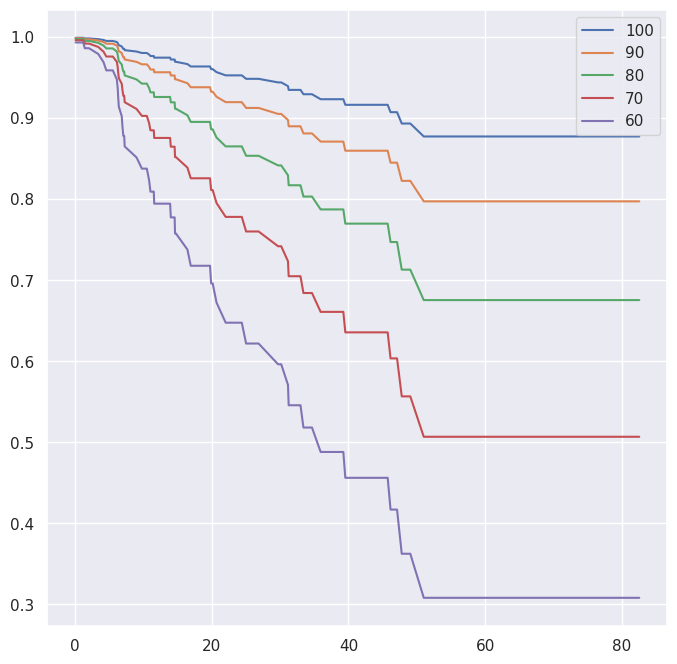

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
predicted_survival.plot(ax=ax);


We can see that the plot matches what we understand from the coefficients of the fitted model, that a higher `ki` value is associated with lower risk, i.e. longer survival times.

### **Q11**

| Observation (Y) | Censoring Indicator ($\delta$) | Covariate (X) |
|-----------------|------------------------------|---------------|
| 26.5            | 1                            | 0.1           |
| 37.2            | 1                            | 11            |
| 57.3            | 1                            | -0.3          |
| 90.8            | 0                            | 2.8           |
| 20.2            | 0                            | 1.8           |
| 89.8            | 0                            | 0.4           |

*TABLE 11.4.*

In [21]:
data = {
    'y': [26.5, 37.2, 57.3, 90.8, 20.2, 89.8],
    'delta': [1, 1, 1, 0, 0, 0],
    'x': [0.1, 11, -0.3, 2.8, 1.8, 0.4]
}
df = pd.DataFrame(data)
df

,y,delta,x
0,26.5,1,0.1
1,37.2,1,11.0
2,57.3,1,-0.3
3,90.8,0,2.8
4,20.2,0,1.8
5,89.8,0,0.4


**(a)** Splitting the data into two groups:

In [22]:
df.loc[df['x'] < 2, 'group'] = "Group1"
df

,y,delta,x,group
0,26.5,1,0.1,Group1
1,37.2,1,11.0,NaN
2,57.3,1,-0.3,Group1
3,90.8,0,2.8,NaN
4,20.2,0,1.8,Group1
5,89.8,0,0.4,Group1


In [23]:
df.loc[df['x'] >= 2, 'group'] = "Group2"
df

,y,delta,x,group
0,26.5,1,0.1,Group1
1,37.2,1,11.0,Group2
2,57.3,1,-0.3,Group1
3,90.8,0,2.8,Group2
4,20.2,0,1.8,Group1
5,89.8,0,0.4,Group1


In [24]:
df['group'] = df['group'].astype('category')

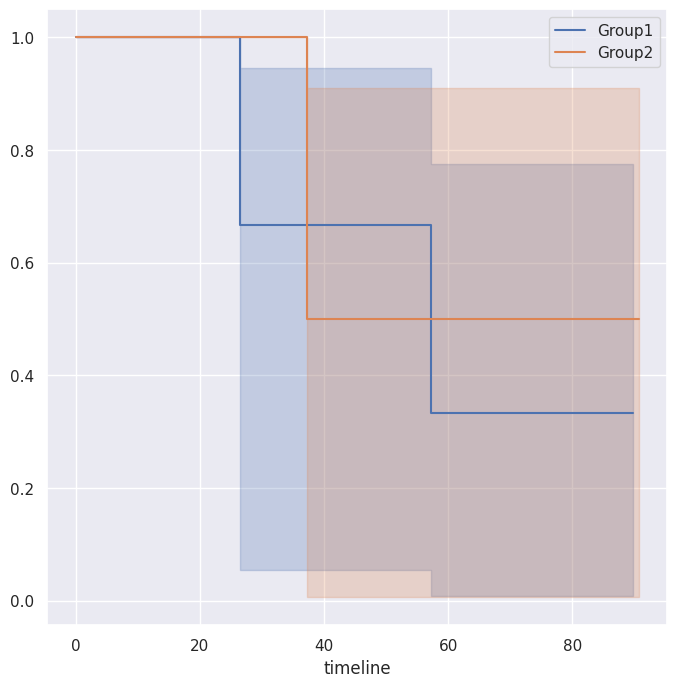

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
for group_name, group in df.groupby('group', observed=True):
    km = KaplanMeierFitter().fit(group['y'], group['delta'])
    km.plot(label=f"{group_name}", ax=ax)

Looking at the fitted Kaplan-Meier curves, I can't see a big difference between the two groups' survival curves.

**(b)**


In [26]:
cols = ['y', 'delta', 'group']
design = MS(cols, intercept=False)
group_df = design.fit_transform(df)
group_df

,y,delta,group[Group2]
0,26.5,1,0.0
1,37.2,1,1.0
2,57.3,1,0.0
3,90.8,0,1.0
4,20.2,0,0.0
5,89.8,0,0.0


In [27]:

cox_fit = CoxPHFitter().fit(group_df,
                            'y',
                            'delta')
cox_fit.summary[['coef', 'se(coef)', 'p']]


,coef,se(coef),p
covariate,,,
group[Group2],-0.340143,1.235876,0.783144


In [28]:
np.e**-0.340143

0.7116685468836035

The estimated coefficient is $-0.340143$. `Group1` is encoded as the baseline here, so we can interpret the coefficient to mean that the risk associated with `Group2` $(e^{-0.340143} = 0.71167)$ is around $30\%$ less than the risk associated with `Group1`. Since the p-value is $0.783$ we have no evidence to believe that the coefficient's true value is non-zero.

**(c)**

We can perform the log-rank test in to two ways either by calling `log_likelihood_ratio_test()` on the CoxPH model we fit earlier or using `logrank_test()` on the two groups. I'll demonstrate both methods.

In [29]:
cox_fit.log_likelihood_ratio_test()

<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 1
        test_name = log-likelihood ratio test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.36

In [30]:
by_group = df.groupby('group', observed=True)
logrank_test(by_group.get_group('Group1')['y'],
             by_group.get_group('Group2')['y'],
             by_group.get_group('Group1')['delta'],
             by_group.get_group('Group2')['delta'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.35

The p-value from the log-rank test returned by both methods is exactly the same as the p-value returned by the Cox model fit in part **(b)**, which is $p = 0.78$.